In [40]:
import pandas as pd


directory = "./result/final_results"
num_seeds = 15
seeds = [i for i in range(num_seeds)]


file_train = "./results/final_results/" + "train_score_seed_{}".format(0)
file_test = "./results/final_results/" + "test_score_seed_{}.csv".format(0)
file_test2 = "./results/final_results/" + "test_score_seed_{}.csv".format(1)

#pd_train = pd.read_csv(file_train, delimiter = ";")
pd_test = pd.read_csv(file_test, delimiter = ";", names= ["Episode", "Score"])
pd_test2 = pd.read_csv(file_test2, delimiter = ";", names= ["Episode", "Score"])

x1 = pd_test["Episode"].values
y1 = pd_test["Score"].values
x2 =pd_test2["Episode"].values
y2 = pd_test2["Score"].values

mean= (y1 + y2)/2

var = ((y1-mean)**2 + (y2-mean)**2)/2 
var = np.sqrt(var)

print(var)

[ 8.5  0.   0.   1.   0.   1.   0.   1.   0.5  0.5  0.   0.5  0.   0.5
  0.5  0.5  4.   0.   0.   1.   0.5  5.   1.5  0.5  5.   2.   6.5  4.5
  4.   3.5  0.5  1.   1.5  6.5  2.  13.  16.   3.5  5.5  1.5  3.  16.
  0.5  7.  18.5 23.5  7.  16.5  9.5 83.   7.  24.  86.  45.  28.   0.
  0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  28.5  0.  11.5  4.   0.   0.   0.   0.  36.   0.   0.   0.  19.5
 27.   0.   8.5 23.   0.  11.5 32.   0.   0.   0.   0.   0.   0.   0.
 23.5 27.5  0.  27.5 19.  27.5 30.   1.  10.   8.   0.  22.5 24.5  0.
 30.5  0.   0.   9.5  6.   0.  37.  11.   0.   0.   5.   0.   0.   5.5
  0.   0.   0.   6.   0.   0.  17.5  0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.  23.5  0.   0.   0.   6.5
 24.5 10.5 15.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  66.5 54.   0.   0.   0.   0.   0.   0.   0.
  6.  27.   0.   9.5  0.  59.5  0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0. 

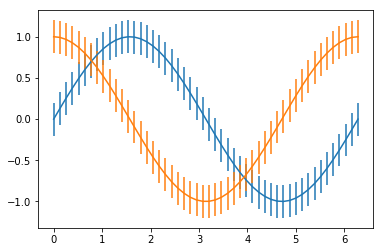

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)
plt.errorbar(x, y_sin, 0.2)
plt.errorbar(x, y_cos, 0.2)
plt.show()

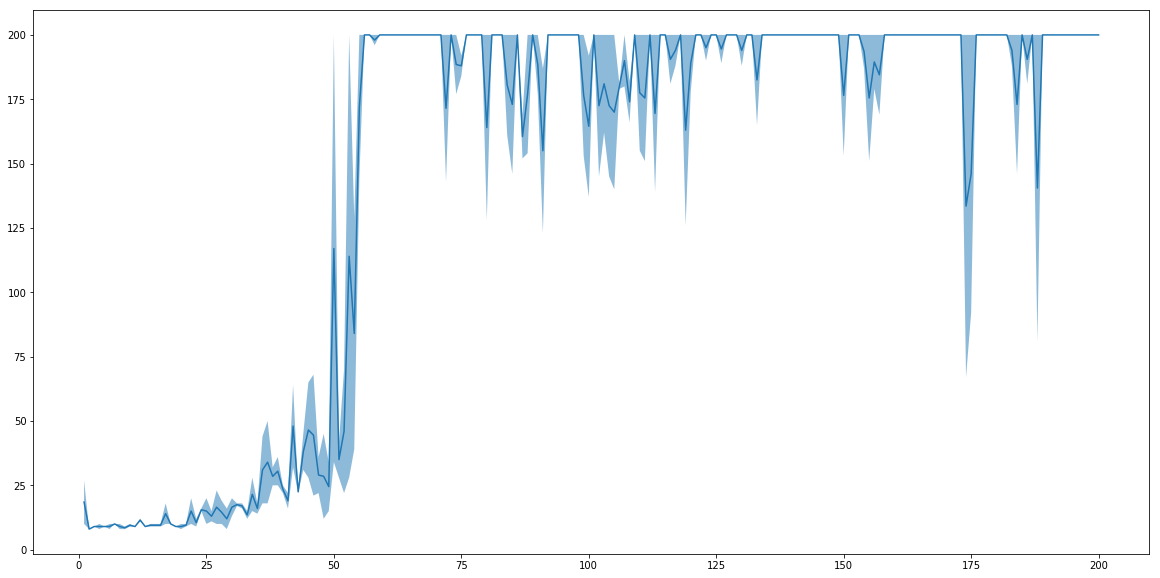

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def custom_plot(x, y, z, figsize, **kwargs):
    fig, ax = plt.subplots(figsize=figsize)
    #ax = kwargs.pop('ax', plt.gca())
    base_line, = ax.plot(x, y)
    ax.fill_between(x, y - var, y + var, facecolor=base_line.get_color(), alpha=0.5)

custom_plot(x, mean, var, (20,10))

plt.show()